#**Download OpenRL Deepfakeface and Split into Train-Valid-Test**

In [ ]:
!git lfs install

Git LFS initialized.


In [ ]:
!git clone https://huggingface.co/datasets/OpenRL/DeepFakeFace

Cloning into 'DeepFakeFace'...
remote: Enumerating objects: 41, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 41 (delta 8), reused 0 (delta 0), pack-reused 15 (from 1)
Unpacking objects: 100% (41/41), 5.98 KiB | 612.00 KiB/s, done.
Filtering content: 100% (8/8), 4.71 GiB | 33.08 MiB/s, done.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

def extractzip(zip_path,extract_path):
  if not os.path.exists(extract_path):
    os.makedirs(extract_path)
  !unzip -q "{zip_path}" -d "{extract_path}"

zip_file1 = '/content/DeepFakeFace/inpainting.zip'
extract1 = '/content/OpenRL deepfake'
zip_file2 = '/content/DeepFakeFace/insight.zip'
extract2 = '/content/OpenRL deepfake'
zip_file3 = '/content/DeepFakeFace/text2img.zip'
extract3 = '/content/OpenRL deepfake'
zip_file4 = '/content/DeepFakeFace/wiki.zip'
extract4 = '/content/OpenRL deepfake'

extractzip(zip_file1,extract1)
extractzip(zip_file2,extract2)
extractzip(zip_file3,extract3)
extractzip(zip_file4,extract4)

In [ ]:
from torchvision import datasets

In [ ]:
path_inpainting = datasets.ImageFolder('/content/OpenRL deepfake/inpainting')
path_insight = datasets.ImageFolder('/content/OpenRL deepfake/insight')
path_text2img = datasets.ImageFolder('/content/OpenRL deepfake/text2img')
path_wiki = datasets.ImageFolder('/content/OpenRL deepfake/wiki')



In [ ]:
from torch.utils.data import DataLoader
real = DataLoader(path_wiki)
fake_inpainting = DataLoader(path_inpainting)
fake_insight = DataLoader(path_insight)
fake_text2img = DataLoader(path_text2img)

In [ ]:
len(real)

30000

In [ ]:
from PIL import Image
img = Image.open('/content/OpenRL deepfake/wiki/00/10110600_1985-09-17_2012.jpg')


In [ ]:
classes = path_wiki.classes
classes

['00',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95',
 '96',
 '97',
 '98',
 '99']

In [ ]:
os.rename('/content/OpenRL deepfake/wiki','/content/OpenRL deepfake/Real')

In [ ]:
path_wiki = datasets.ImageFolder('/content/OpenRL deepfake/Real')
classes = path_wiki.classes

In [ ]:
classes

In [ ]:
import shutil
parent_dir = '/content/OpenRL deepfake/text2img'

for root, dirs, files in os.walk(parent_dir, topdown=False):
  if root == parent_dir:
        continue
  for file in files:
        source_file_path = os.path.join(root, file)
        target_file_path = os.path.join(os.path.dirname(root), file)
        base, extension = os.path.splitext(file)
        counter = 1
        while os.path.exists(target_file_path):
            target_file_path = os.path.join(os.path.dirname(root), f"{base}_{counter}{extension}")
            counter += 1
        shutil.move(source_file_path, target_file_path)

for root, dirs, files in os.walk(parent_dir, topdown=False):
     if root == parent_dir:
         continue
     if not os.listdir(root):
         try:
             os.rmdir(root)
         except OSError: # Catch OSError if directory is not truly empty or other issue
              pass # Ignore error, assume directory wasn't empty or had permission issues

print("Subfolder flattening complete.")

Subfolder flattening complete.


In [ ]:
import os
import random
import shutil
from torchvision import datasets

source_directory = '/content/OpenRL deepfake/text2img'
sample_size = 10000
# The target directory where the 'Fake' subdirectory will be created
base_target_directory = '/content/OpenRL deepfake'
# The actual directory where the sampled fake images will be placed
fake_class_directory = os.path.join(base_target_directory, 'Fake')

all_files = []

for root, dirs, files in os.walk(source_directory):
    for file in files:
        file_path = os.path.join(root, file)
        all_files.append(file_path)

# Check if there are enough files to sample
if len(all_files) < sample_size:
    print(f"Warning: Not enough files in {source_directory} to sample {sample_size}. Sampling all available files.")
    selected_files = all_files
else:
    selected_files = random.sample(all_files, sample_size)

# Create the 'Fake' subdirectory
if not os.path.exists(fake_class_directory):
    os.makedirs(fake_class_directory)

print(f"Copying {len(selected_files)} selected files to '{fake_class_directory}'...")

for file_path in selected_files:
    file_name = os.path.basename(file_path)
    # Target path within the 'Fake' subdirectory
    target_file_path = os.path.join(fake_class_directory, file_name)

    base, extension = os.path.splitext(file_name)
    counter = 1
    original_target_file_path = target_file_path
    while os.path.exists(target_file_path):
        target_file_path = os.path.join(fake_class_directory, f"{base}_{counter}{extension}")
        counter += 1

    try:
        shutil.copy2(file_path, target_file_path)
    except Exception as e:
        print(f"Error copying file {file_path}: {e}")

print("Sampling and copying complete.")

Copying 10000 selected files to '/content/OpenRL deepfake/Fake'...
Sampling and copying complete.


In [ ]:
extractzip(zip_file4,extract4)

In [ ]:
os.rename('/content/OpenRL deepfake/wiki','/content/OpenRL deepfake/Real')

In [ ]:
real_dir = '/content/OpenRL deepfake/Fake'
real_class_subdir_name = 'Fake'
real_class_subdir_path = os.path.join(real_dir, real_class_subdir_name)

if not os.path.exists(real_class_subdir_path):
    os.makedirs(real_class_subdir_path)

print(f"Moving image files into '{real_class_subdir_path}'...")

for root, dirs, files in os.walk(real_dir, topdown=True):
    if root == real_class_subdir_path:
        continue

    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.tiff')):
            source_file_path = os.path.join(root, file)

            target_file_name = file
            target_file_path = os.path.join(real_class_subdir_path, target_file_name)

            base, extension = os.path.splitext(target_file_name)
            counter = 1
            while os.path.exists(target_file_path):
                target_file_name = f"{base}_{counter}{extension}"
                target_file_path = os.path.join(real_class_subdir_path, target_file_name)
                counter += 1

            try:
                shutil.move(source_file_path, target_file_path)
            except Exception as e:
                print(f"Error moving file {source_file_path}: {e}")

print("Finished moving files.")

print("Cleaning up empty subdirectories...")
for root, dirs, files in os.walk(real_dir, topdown=False):
    if root in [real_dir, real_class_subdir_path]:
        continue

    try:
        if not os.listdir(root):
             os.rmdir(root)
    except OSError as e:
         pass


print("Subdirectory cleanup complete.")

if os.path.exists(real_class_subdir_path) and os.listdir(real_class_subdir_path):
    Real = datasets.ImageFolder(real_dir)
    print("ImageFolder created successfully for Real data.")
else:
    print(f"Error: Could not create ImageFolder. Expected directory '{real_class_subdir_path}' not found or is empty.")

Moving image files into '/content/OpenRL deepfake/Fake/Fake'...
Finished moving files.
Cleaning up empty subdirectories...
Subdirectory cleanup complete.
ImageFolder created successfully for Real data.


In [ ]:
import os
import shutil
import random
from pathlib import Path

def split_dataset():
    # Configuration
    source_base = '/content/OpenRL deepfake/Fake'
    target_base = '/content/OpenRL deepfake'

    train_ratio = 0.7
    val_ratio = 0.20
    test_ratio = 0.10

    classes = ['Real', 'Fake']
    splits = ['Train', 'Validation', 'Test']

    print("🚀 Starting dataset split...")

    for class_name in classes:
        print(f"\n📁 Processing {class_name} images...")

        # Get all files from this class
        source_dir = os.path.join(source_base, class_name)
        if not os.path.exists(source_dir):
            print(f"❌ {source_dir} doesn't exist. Skipping...")
            continue

        all_files = []
        for file in os.listdir(source_dir):
            file_path = os.path.join(source_dir, file)
            if os.path.isfile(file_path):
                all_files.append(file_path)

        if not all_files:
            print(f"❌ No files found in {source_dir}")
            continue

        # Shuffle files randomly
        random.shuffle(all_files)
        total_files = len(all_files)

        # Calculate split indices
        train_end = int(total_files * train_ratio)
        val_end = train_end + int(total_files * val_ratio)

        # Split the files
        splits_data = {
            'Train': all_files[:train_end],
            'Validation': all_files[train_end:val_end],
            'Test': all_files[val_end:]
        }

        print(f"📊 Split breakdown for {class_name}:")
        print(f"   Train: {len(splits_data['Train'])} files")
        print(f"   Validation: {len(splits_data['Validation'])} files")
        print(f"   Test: {len(splits_data['Test'])} files")

        # Copy files to respective directories
        for split_name, file_list in splits_data.items():
            if not file_list:
                continue

            # Create target directory
            target_dir = os.path.join(target_base, split_name, class_name)
            os.makedirs(target_dir, exist_ok=True)

            print(f"📋 Copying {len(file_list)} {class_name} files to {split_name}...")

            # Copy each file
            for file_path in file_list:
                file_name = os.path.basename(file_path)
                target_path = os.path.join(target_dir, file_name)

                # Handle duplicate names
                if os.path.exists(target_path):
                    base, ext = os.path.splitext(file_name)
                    counter = 1
                    while os.path.exists(target_path):
                        new_name = f"{base}_{counter}{ext}"
                        target_path = os.path.join(target_dir, new_name)
                        counter += 1

                try:
                    shutil.copy2(file_path, target_path)
                except Exception as e:
                    print(f"❌ Error copying {file_name}: {e}")

    print("\n✅ Dataset split complete!")
    print("\n📂 Final directory structure:")
    for split in splits:
        split_path = os.path.join(target_base, split)
        if os.path.exists(split_path):
            print(f"   {split}/")
            for class_name in classes:
                class_path = os.path.join(split_path, class_name)
                if os.path.exists(class_path):
                    file_count = len([f for f in os.listdir(class_path)
                                    if os.path.isfile(os.path.join(class_path, f))])
                    print(f"     └── {class_name}/ ({file_count} files)")

# Set random seed for reproducible results
random.seed(42)

# Run the split
split_dataset()

🚀 Starting dataset split...

📁 Processing Real images...
❌ /content/OpenRL deepfake/Fake/Real doesn't exist. Skipping...

📁 Processing Fake images...
📊 Split breakdown for Fake:
   Train: 21000 files
   Validation: 6000 files
   Test: 3000 files
📋 Copying 21000 Fake files to Train...
📋 Copying 6000 Fake files to Validation...
📋 Copying 3000 Fake files to Test...

✅ Dataset split complete!

📂 Final directory structure:
   Train/
     └── Real/ (21000 files)
     └── Fake/ (21000 files)
   Validation/
     └── Real/ (6000 files)
     └── Fake/ (6000 files)
   Test/
     └── Real/ (3000 files)
     └── Fake/ (3000 files)


In [ ]:
def zip_dataset():
    source_dir = '/content/OpenRL deepfake'
    zip_name = '/content/OpenRL_deepfake_dataset'

    if os.path.exists(source_dir):
        shutil.make_archive(zip_name, 'zip', source_dir)
        print(f"Dataset saved as: {zip_name}.zip")
    else:
        print("Source directory not found")

zip_dataset()

Dataset saved as: /content/OpenRL_deepfake_dataset.zip


In [ ]:
!rsync -a --progress '/content/OpenRL_deepfake_dataset.zip' '/content/drive/MyDrive/Deepfake_dataset'

sending incremental file list
OpenRL_deepfake_dataset.zip
  2,860,175,723 100%   80.11MB/s    0:00:34 (xfr#1, to-chk=0/1)


# **EDA OpenRL Deepfakeface**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

def extractzip(zip_path,extract_path):
  if not os.path.exists(extract_path):
    os.makedirs(extract_path)
  !unzip -q "{zip_path}" -d "{extract_path}"

zip_file = '/content/drive/MyDrive/Deepfake_dataset/OpenRL_deepfake_dataset.zip'
extract = '/content/OpenRL deepfake'

extractzip(zip_file,extract)

In [ ]:
import torchvision.transforms as TF
import torchvision.datasets as datasets
from torch.utils.data import DataLoader

train_tran = TF.Compose([
    TF.Resize((224,224)),
    TF.ToTensor()
])

val_tran = TF.Compose([
    TF.Resize((224,224)),
    TF.ToTensor()
])

train_path = datasets.ImageFolder('/content/OpenRL deepfake/Train',transform = train_tran)
val_path = datasets.ImageFolder('/content/OpenRL deepfake/Validation',transform= val_tran)
test_path = datasets.ImageFolder('/content/OpenRL deepfake/Test',transform=val_tran)

print(f"Train data set size: {len(train_path)}")
print(f"Validation data set size: {len(val_path)}")
print(f"Test data set size: {len(test_path)}")

Train data set size: 42000
Validation data set size: 12000
Test data set size: 6000


In [ ]:
train_loader = DataLoader(train_path,batch_size = 32,shuffle = True)
val_loader = DataLoader(val_path,batch_size = 32)
test_loader = DataLoader(test_path, batch_size = 32)

In [ ]:
images, labels = next(iter(train_loader))

In [ ]:
images.shape, labels.shape

(torch.Size([32, 3, 224, 224]), torch.Size([32]))

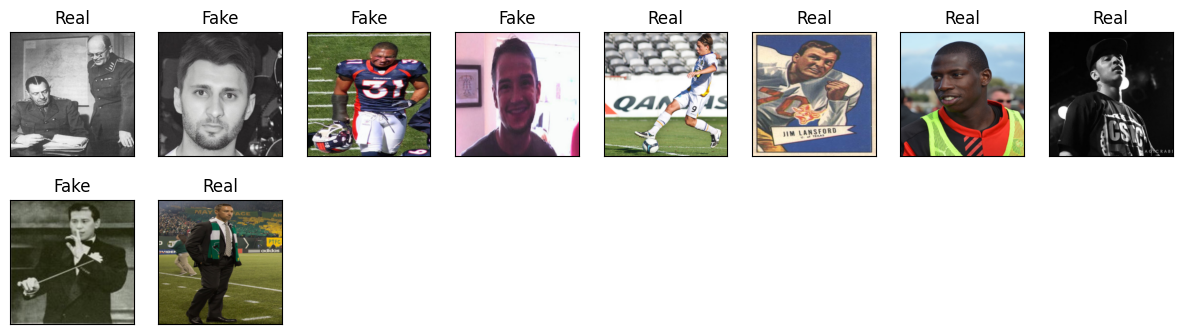

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

idx2_class = {v: k for k, v in train_path.class_to_idx.items()}
fig = plt.figure(figsize=(15, 4))
for i in range(10):
    image = np.transpose(images.cpu()[i],(1,2,0))
    label = idx2_class[labels.cpu().tolist()[i]]
    ax = fig.add_subplot(2, 8, i + 1, xticks=[], yticks=[])
    plt.imshow(image)
    ax.set_title(label)


@misc{song2023robustness,
      title={Robustness and Generalizability of Deepfake Detection: A Study with Diffusion Models},
      author={Haixu Song and Shiyu Huang and Yinpeng Dong and Wei-Wei Tu},
      year={2023},
      eprint={2309.02218},
      archivePrefix={arXiv},
      primaryClass={cs.CV}
}


# **Whab deepfake download**


In [ ]:
!git lfs install

Git LFS initialized.


In [ ]:
!git clone https://huggingface.co/datasets/Whab/deepfake

Cloning into 'deepfake'...
remote: Enumerating objects: 22, done.
remote: Total 22 (delta 0), reused 0 (delta 0), pack-reused 22 (from 1)
Unpacking objects: 100% (22/22), 2.99 KiB | 1020.00 KiB/s, done.
Filtering content: 100% (4/4), 1.56 GiB | 149.21 MiB/s, done.


In [ ]:
import pandas as pd
import os
import io
from PIL import Image
from sklearn.model_selection import train_test_split
import glob
import multiprocessing

def worker_save_image(task_args):
    image_data_from_parquet, full_save_path = task_args
    actual_image_bytes = None

    try:
        if isinstance(image_data_from_parquet, bytes):
            actual_image_bytes = image_data_from_parquet
        elif isinstance(image_data_from_parquet, dict) and 'bytes' in image_data_from_parquet:
            actual_image_bytes = image_data_from_parquet['bytes']
            if not isinstance(actual_image_bytes, bytes):
                print(f"Error: 'bytes' key in image data dict did not contain bytes for {full_save_path}. Found type: {type(actual_image_bytes)}.")
                return None
        else:
            print(f"Error: Unexpected image data format ({type(image_data_from_parquet)}) for {full_save_path}. Expected bytes or dict with 'bytes' key.")
            return None

        img = Image.open(io.BytesIO(actual_image_bytes))
        if img.mode != 'RGB':
            img = img.convert('RGB')
        img.save(full_save_path)
        return full_save_path
    except Exception as e:
        print(f"Error processing/saving image to {full_save_path}. Error: {e}")
        return None

def process_parquet_directory_parallel(input_dir_path, base_output_dir="output_image_dataset_split"):

    parquet_files = glob.glob(os.path.join(input_dir_path, '*.parquet'))
    if not parquet_files:
        print(f"No Parquet files found in directory: {input_dir_path}")
        return
    print(f"Found Parquet files: {parquet_files}")

    all_dataframes = []
    for file_path in parquet_files:
        print(f"Reading Parquet file: {file_path}")
        df_current = pd.read_parquet(file_path, columns=['image', 'label'])
        if 'image' not in df_current.columns or 'label' not in df_current.columns:
            print(f"Warning: File {file_path} is missing 'image' or 'label' column. Skipping.")
            continue
        all_dataframes.append(df_current)

    if not all_dataframes:
        print("No valid data loaded from Parquet files. Exiting.")
        return
    combined_df = pd.concat(all_dataframes, ignore_index=True)
    print(f"Loaded {len(combined_df)} records. Labels found: {combined_df['label'].unique()}")

    train_dir = os.path.join(base_output_dir, 'Train')
    val_dir = os.path.join(base_output_dir, 'Validation')
    test_dir = os.path.join(base_output_dir, 'Test')

    for split_path in [train_dir, val_dir, test_dir]:
        for label_name_str in ['Fake', 'Real']:
            os.makedirs(os.path.join(split_path, label_name_str), exist_ok=True)
    print(f"Output directories created under: {base_output_dir}")

    train_df, temp_df = train_test_split(
        combined_df,
        test_size=0.25,
        stratify=combined_df['label'],
        random_state=42
    )

    val_df, test_df = train_test_split(
        temp_df,
        test_size=0.60,
        stratify=temp_df['label'],
        random_state=42
    )

    print(f"Data split complete:")
    print(f"  Train: {len(train_df)} images ({len(train_df)/len(combined_df)*100:.2f}%)")
    print(f"  Validation: {len(val_df)} images ({len(val_df)/len(combined_df)*100:.2f}%)")
    print(f"  Test: {len(test_df)} images ({len(test_df)/len(combined_df)*100:.2f}%)")

    def prepare_tasks_for_split(dataframe, output_split_dir, split_name_for_log):
        tasks = []
        fake_counter = 0
        real_counter = 0
        print(f"Preparing tasks for {split_name_for_log} set...")

        for _, row in dataframe.iterrows():
            image_bytes = row['image']
            label_int = row['label']

            string_label = None
            if label_int == 1:
                string_label = 'Fake'
            elif label_int == 0:
                string_label = 'Real'
            else:
                continue

            if string_label == 'Fake':
                fake_counter += 1
                filename = f'fake_{fake_counter:05d}.png'
            else:
                real_counter += 1
                filename = f'real_{real_counter:05d}.png'

            full_save_path = os.path.join(output_split_dir, string_label, filename)
            tasks.append((image_bytes, full_save_path))

        print(f"Prepared {len(tasks)} tasks for {split_name_for_log} (Fake: {fake_counter}, Real: {real_counter}).")
        return tasks

    train_tasks = prepare_tasks_for_split(train_df, train_dir, "Train")
    val_tasks = prepare_tasks_for_split(val_df, val_dir, "Validation")
    test_tasks = prepare_tasks_for_split(test_df, test_dir, "Test")

    num_processes = os.cpu_count()
    print(f"\nStarting image processing with {num_processes} parallel processes...")

    all_tasks = train_tasks + val_tasks + test_tasks
    if not all_tasks:
        print("No tasks to process. Exiting.")
        return

    successful_saves = 0
    failed_saves = 0
    with multiprocessing.Pool(processes=num_processes) as pool:
        for result in pool.imap_unordered(worker_save_image, all_tasks):
            if result is not None:
                successful_saves += 1
            else:
                failed_saves += 1

            if (successful_saves + failed_saves) > 0 and (successful_saves + failed_saves) % 1000 == 0:
                print(f"Processed {successful_saves + failed_saves}/{len(all_tasks)} images (Successful: {successful_saves}, Failed: {failed_saves})...")

    print(f"\nFinished processing all tasks.")
    print(f"Total images targeted: {len(all_tasks)}")
    print(f"Successfully saved: {successful_saves} images.")
    print(f"Failed to save: {failed_saves} images.")
    print(f"Data saved in: {os.path.abspath(base_output_dir)}")

    print(f"Train Fake on disk: {len(os.listdir(os.path.join(train_dir, 'Fake')))} images")
    print(f"Train Real on disk: {len(os.listdir(os.path.join(train_dir, 'Real')))} images")
    print(f"Validation Fake on disk: {len(os.listdir(os.path.join(val_dir, 'Fake')))} images")
    print(f"Validation Real on disk: {len(os.listdir(os.path.join(val_dir, 'Real')))} images")
    print(f"Test Fake on disk: {len(os.listdir(os.path.join(test_dir, 'Fake')))} images")
    print(f"Test Real on disk: {len(os.listdir(os.path.join(test_dir, 'Real')))} images")


if __name__ == '__main__':
    multiprocessing.freeze_support()

    parquet_input_directory = '/content/deepfake/data'
    output_dataset_dir = '/content/Whab-deepfake'

    if parquet_input_directory == 'YOUR_PARQUET_FILES_DIRECTORY_PLACEHOLDER':
        print("Please update 'parquet_input_directory' with your Parquet files' directory path.")
    elif not os.path.isdir(parquet_input_directory):
        print(f"Error: Input directory not found: '{parquet_input_directory}'.")
    else:
        process_parquet_directory_parallel(parquet_input_directory, output_dataset_dir)

Found Parquet files: ['/content/deepfake/data/train-00003-of-00004-7f801689401ea383.parquet', '/content/deepfake/data/train-00000-of-00004-51c797bb91ec4f77.parquet', '/content/deepfake/data/train-00001-of-00004-ccb6dd731b99f9e6.parquet', '/content/deepfake/data/train-00002-of-00004-8cfe3eb07ee61d91.parquet']
Reading Parquet file: /content/deepfake/data/train-00003-of-00004-7f801689401ea383.parquet
Reading Parquet file: /content/deepfake/data/train-00000-of-00004-51c797bb91ec4f77.parquet
Reading Parquet file: /content/deepfake/data/train-00001-of-00004-ccb6dd731b99f9e6.parquet
Reading Parquet file: /content/deepfake/data/train-00002-of-00004-8cfe3eb07ee61d91.parquet
Loaded 179430 records. Labels found: [1 0]
Output directories created under: /content/Whab-deepfake
Data split complete:
  Train: 134572 images (75.00%)
  Validation: 17943 images (10.00%)
  Test: 26915 images (15.00%)
Preparing tasks for Train set...
Prepared 134572 tasks for Train (Fake: 67341, Real: 67231).
Preparing task

# **10K Whab Fix**

In [ ]:
import pandas as pd
import os
import io
from PIL import Image
from sklearn.model_selection import train_test_split
import glob
import multiprocessing
from tqdm.auto import tqdm

# Make sure the worker function is defined or imported if it's in a separate cell
# If worker_save_image is defined in a previous cell, ensure that cell is run first.
# Otherwise, include the definition here:
def worker_save_image(task_args):
    image_data_from_parquet, full_save_path = task_args
    actual_image_bytes = None

    try:
        if isinstance(image_data_from_parquet, bytes):
            actual_image_bytes = image_data_from_parquet
        elif isinstance(image_data_from_parquet, dict) and 'bytes' in image_data_from_parquet:
            actual_image_bytes = image_data_from_parquet['bytes']
            if not isinstance(actual_image_bytes, bytes):
                return None
        else:
             return None

        img = Image.open(io.BytesIO(actual_image_bytes))
        if img.mode != 'RGB':
            img = img.convert('RGB')
        img.save(full_save_path)
        return full_save_path
    except Exception as e:
         return None


def process_parquet_directory_parallel(input_dir_path, base_output_dir="output_image_dataset_split"):

    parquet_files = glob.glob(os.path.join(input_dir_path, '*.parquet'))
    if not parquet_files:
        print(f"No Parquet files found in directory: {input_dir_path}")
        return
    print(f"Found Parquet files: {parquet_files}")

    all_dataframes = []
    for file_path in parquet_files:
        print(f"Reading Parquet file: {file_path}")
        df_current = pd.read_parquet(file_path, columns=['image', 'label'])
        if 'image' not in df_current.columns or 'label' not in df_current.columns:
            print(f"Warning: File {file_path} is missing 'image' or 'label' column. Skipping.")
            continue
        all_dataframes.append(df_current)

    if not all_dataframes:
        print("No valid data loaded from Parquet files. Exiting.")
        return
    combined_df = pd.concat(all_dataframes, ignore_index=True)
    print(f"Loaded {len(combined_df)} records. Labels found: {combined_df['label'].unique()}")

    # Create output directories
    train_dir = os.path.join(base_output_dir, 'Train')
    val_dir = os.path.join(base_output_dir, 'Validation')
    test_dir = os.path.join(base_output_dir, 'Test')

    for split_path in [train_dir, val_dir, test_dir]:
        for label_name_str in ['Fake', 'Real']:
            os.makedirs(os.path.join(split_path, label_name_str), exist_ok=True)
    print(f"Output directories created under: {base_output_dir}")

    # Separate data by label
    fake_df = combined_df[combined_df['label'] == 1]
    real_df = combined_df[combined_df['label'] == 0]

    print(f"Found {len(fake_df)} fake images and {len(real_df)} real images.")

    # Sample 10k from each class
    sample_size_per_class = 10000

    if len(fake_df) < sample_size_per_class:
        print(f"Warning: Not enough fake images ({len(fake_df)}) to sample {sample_size_per_class}. Using all fake images.")
        sampled_fake_df = fake_df
    else:
        # Use .copy() to avoid SettingWithCopyWarning
        sampled_fake_df = fake_df.sample(n=sample_size_per_class, random_state=42).copy()

    if len(real_df) < sample_size_per_class:
        print(f"Warning: Not enough real images ({len(real_df)}) to sample {sample_size_per_class}. Using all real images.")
        sampled_real_df = real_df
    else:
        # Use .copy()
        sampled_real_df = real_df.sample(n=sample_size_per_class, random_state=42).copy()

    print(f"Sampled {len(sampled_fake_df)} fake images and {len(sampled_real_df)} real images.")

    # Combine sampled data
    sampled_combined_df = pd.concat([sampled_fake_df, sampled_real_df], ignore_index=True)

    # Split the sampled data into train, validation, and test sets (70/20/10)
    # First split: 70% train, 30% temp (for val/test)
    train_df, temp_df = train_test_split(
        sampled_combined_df,
        test_size=0.30, # 30% for validation and test combined
        stratify=sampled_combined_df['label'],
        random_state=42 # Ensure reproducibility
    )

    # Second split: Split temp_df into 2/3 validation and 1/3 test (relative to temp_df size)
    # This results in 20% val (2/3 of 30%) and 10% test (1/3 of 30%) of the original sampled data
    val_df, test_df = train_test_split(
        temp_df,
        test_size=1/3, # 1/3 of temp_df for test, 2/3 for validation
        stratify=temp_df['label'],
        random_state=42 # Ensure reproducibility
    )

    print(f"Data split complete (70/20/10):")
    print(f"  Train: {len(train_df)} images ({len(train_df)/len(sampled_combined_df)*100:.2f}%)")
    print(f"  Validation: {len(val_df)} images ({len(val_df)/len(sampled_combined_df)*100:.2f}%)")
    print(f"  Test: {len(test_df)} images ({len(test_df)/len(sampled_combined_df)*100:.2f}%)")

    def prepare_tasks_for_split(dataframe, output_split_dir, split_name_for_log):
        tasks = []
        fake_counter = 0
        real_counter = 0
        # print(f"Preparing tasks for {split_name_for_log} set...") # Moved print outside loop for less verbosity

        for _, row in dataframe.iterrows():
            image_bytes = row['image']
            label_int = row['label'] # Assuming 1 for Fake, 0 for Real

            string_label = None
            if label_int == 1:
                string_label = 'Fake'
            elif label_int == 0:
                string_label = 'Real'
            else:
                continue

            if string_label == 'Fake':
                fake_counter += 1
                filename = f'fake_{fake_counter:05d}.png'
            else:
                real_counter += 1
                filename = f'real_{real_counter:05d}.png'

            full_save_path = os.path.join(output_split_dir, string_label, filename)
            tasks.append((image_bytes, full_save_path))

        # print(f"Prepared {len(tasks)} tasks for {split_name_for_log} (Fake: {fake_counter}, Real: {real_counter}).") # Moved print outside loop
        return tasks

    # Prepare tasks for each split
    print("Preparing tasks for Train, Validation, and Test sets...")
    train_tasks = prepare_tasks_for_split(train_df, train_dir, "Train")
    val_tasks = prepare_tasks_for_split(val_df, val_dir, "Validation")
    test_tasks = prepare_tasks_for_split(test_df, test_dir, "Test")
    all_tasks = train_tasks + val_tasks + test_tasks
    print(f"Total tasks prepared: {len(all_tasks)}")

    if not all_tasks:
        print("No tasks to process. Exiting.")
        return

    # Use multiprocessing Pool to process tasks in parallel
    num_processes = os.cpu_count() # Use the number of available CPU cores
    print(f"\nStarting image processing with {num_processes} parallel processes...")

    # Initialize counters for successful and failed saves
    successful_saves = 0
    failed_saves = 0

    # Use tqdm for a progress bar to show the progress of image saving
    with multiprocessing.Pool(processes=num_processes) as pool:
        # imap_unordered processes tasks and yields results as they complete (not necessarily in order)
        # Wrap the iterable in tqdm for a progress bar
        for result in tqdm(pool.imap_unordered(worker_save_image, all_tasks), total=len(all_tasks), desc="Saving Images"):
            if result is not None:
                successful_saves += 1
            else:
                failed_saves += 1

            # Optional: Print progress updates periodically (less verbose with tqdm)
            # if (successful_saves + failed_saves) > 0 and (successful_saves + failed_saves) % 1000 == 0:
            #     print(f"Processed {successful_saves + failed_saves}/{len(all_tasks)} images (Successful: {successful_saves}, Failed: {failed_saves})...")


    # Print final statistics after all tasks are processed
    print(f"\nFinished processing all tasks.")
    print(f"Total images targeted: {len(all_tasks)}")
    print(f"Successfully saved: {successful_saves} images.")
    print(f"Failed to save: {failed_saves} images.")
    print(f"Data saved in: {os.path.abspath(base_output_dir)}")

    # Verify the number of files saved on disk
    print("\nVerifying counts on disk:")
    print(f"  Train Fake on disk: {len(os.listdir(os.path.join(train_dir, 'Fake')))} images")
    print(f"  Train Real on disk: {len(os.listdir(os.path.join(train_dir, 'Real')))} images")
    print(f"  Validation Fake on disk: {len(os.listdir(os.path.join(val_dir, 'Fake')))} images")
    print(f"  Validation Real on disk: {len(os.listdir(os.path.join(val_dir, 'Real')))} images")
    print(f"  Test Fake on disk: {len(os.listdir(os.path.join(test_dir, 'Fake')))} images")
    print(f"  Test Real on disk: {len(os.listdir(os.path.join(test_dir, 'Real')))} images")

In [ ]:
if __name__ == '__main__':
    multiprocessing.freeze_support() # Needed for Windows compatibility

    # Define the input directory containing the Parquet files
    parquet_input_directory = '/content/deepfake/data'

    output_dataset_dir = '/content/Whab-deepfake'

    if parquet_input_directory == 'YOUR_PARQUET_FILES_DIRECTORY_PLACEHOLDER':
        print("Please update 'parquet_input_directory' with your Parquet files' directory path.")
    elif not os.path.isdir(parquet_input_directory):
        print(f"Error: Input directory not found: '{parquet_input_directory}'.")
    else:
        # Call the main processing function if the input directory is valid
        process_parquet_directory_parallel(parquet_input_directory, output_dataset_dir)

Found Parquet files: ['/content/deepfake/data/train-00003-of-00004-7f801689401ea383.parquet', '/content/deepfake/data/train-00000-of-00004-51c797bb91ec4f77.parquet', '/content/deepfake/data/train-00002-of-00004-8cfe3eb07ee61d91.parquet', '/content/deepfake/data/train-00001-of-00004-ccb6dd731b99f9e6.parquet']
Reading Parquet file: /content/deepfake/data/train-00003-of-00004-7f801689401ea383.parquet
Reading Parquet file: /content/deepfake/data/train-00000-of-00004-51c797bb91ec4f77.parquet
Reading Parquet file: /content/deepfake/data/train-00002-of-00004-8cfe3eb07ee61d91.parquet
Reading Parquet file: /content/deepfake/data/train-00001-of-00004-ccb6dd731b99f9e6.parquet
Loaded 179430 records. Labels found: [1 0]
Output directories created under: /content/Whab-deepfake
Found 89788 fake images and 89642 real images.
Sampled 10000 fake images and 10000 real images.
Data split complete (70/20/10):
  Train: 14000 images (70.00%)
  Validation: 4000 images (20.00%)
  Test: 2000 images (10.00%)
Pre

Saving Images:   0%|          | 0/20000 [00:00<?, ?it/s]


Finished processing all tasks.
Total images targeted: 20000
Successfully saved: 20000 images.
Failed to save: 0 images.
Data saved in: /content/Whab-deepfake

Verifying counts on disk:
  Train Fake on disk: 7000 images
  Train Real on disk: 7000 images
  Validation Fake on disk: 2000 images
  Validation Real on disk: 2000 images
  Test Fake on disk: 1000 images
  Test Real on disk: 1000 images


In [ ]:
import shutil

def zip_dataset():
    source_dir = '/content/Whab-deepfake'
    zip_name = '/content/zip-Whab-deepfake'

    if os.path.exists(source_dir):
        shutil.make_archive(zip_name, 'zip', source_dir)
        print(f"Dataset saved as: {zip_name}.zip")
    else:
        print("Source directory not found")

zip_dataset()

Dataset saved as: /content/zip-Whab-deepfake.zip


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!rsync -a --progress '/content/zip-Whab-deepfake20k.zip' '/content/drive/MyDrive/Deepfake_dataset'

sending incremental file list
zip-Whab-deepfake20k.zip
  1,627,266,807 100%  235.81MB/s    0:00:06 (xfr#1, to-chk=0/1)


# **EDA Whab-deepfake**

In [ ]:
import os

def extractzip(zip_path,extract_path):
  if not os.path.exists(extract_path):
    os.makedirs(extract_path)
  !unzip -q "{zip_path}" -d "{extract_path}"

zip_file = '/content/drive/MyDrive/Deepfake_dataset/zip-Whab-deepfake20k.zip'
extract = '/content/unzip-Whab-deepfake'

extractzip(zip_file,extract)

In [ ]:
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as TF

train_tran = TF.Compose([
    TF.Resize((224,224)),
    TF.ToTensor()
])

val_tran = TF.Compose([
    TF.Resize((224,224)),
    TF.ToTensor()
])

train_path = datasets.ImageFolder('/content/unzip-Whab-deepfake/Train',transform = train_tran)
val_path = datasets.ImageFolder('/content/unzip-Whab-deepfake/Validation',transform= val_tran)
test_path = datasets.ImageFolder('/content/unzip-Whab-deepfake/Test',transform=val_tran)

In [ ]:
train_loader = DataLoader(train_path,batch_size = 32,shuffle = True)
val_loader = DataLoader(val_path,batch_size = 32)
test_loader = DataLoader(test_path, batch_size = 32)

In [ ]:
images,labels = next(iter(train_loader))

In [ ]:
images.size() , labels.size()

(torch.Size([32, 3, 224, 224]), torch.Size([32]))

In [ ]:
type(labels)

torch.Tensor

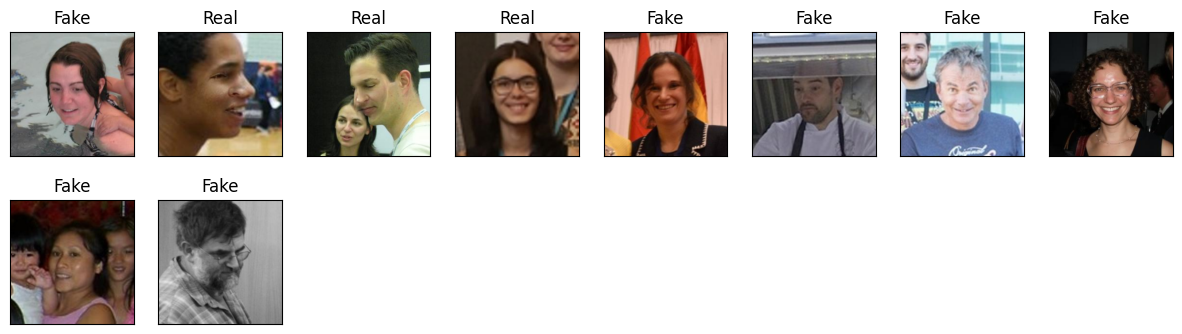

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

idx2_class = {v: k for k, v in train_path.class_to_idx.items()}
fig = plt.figure(figsize=(15, 4))
for i in range(10):
    image = np.transpose(images.cpu()[i],(1,2,0))
    string_label = idx2_class[labels.cpu().tolist()[i]]
    ax = fig.add_subplot(2, 8, i + 1, xticks=[], yticks=[])
    plt.imshow(image)
    ax.set_title(string_label)


Class mapping used: {0: 'Fake', 1: 'Real'}

Train Set Distribution: {'Fake': 7000, 'Real': 7000}
Validation Set Distribution: {'Fake': 2000, 'Real': 2000}
Test Set Distribution: {'Fake': 1000, 'Real': 1000}


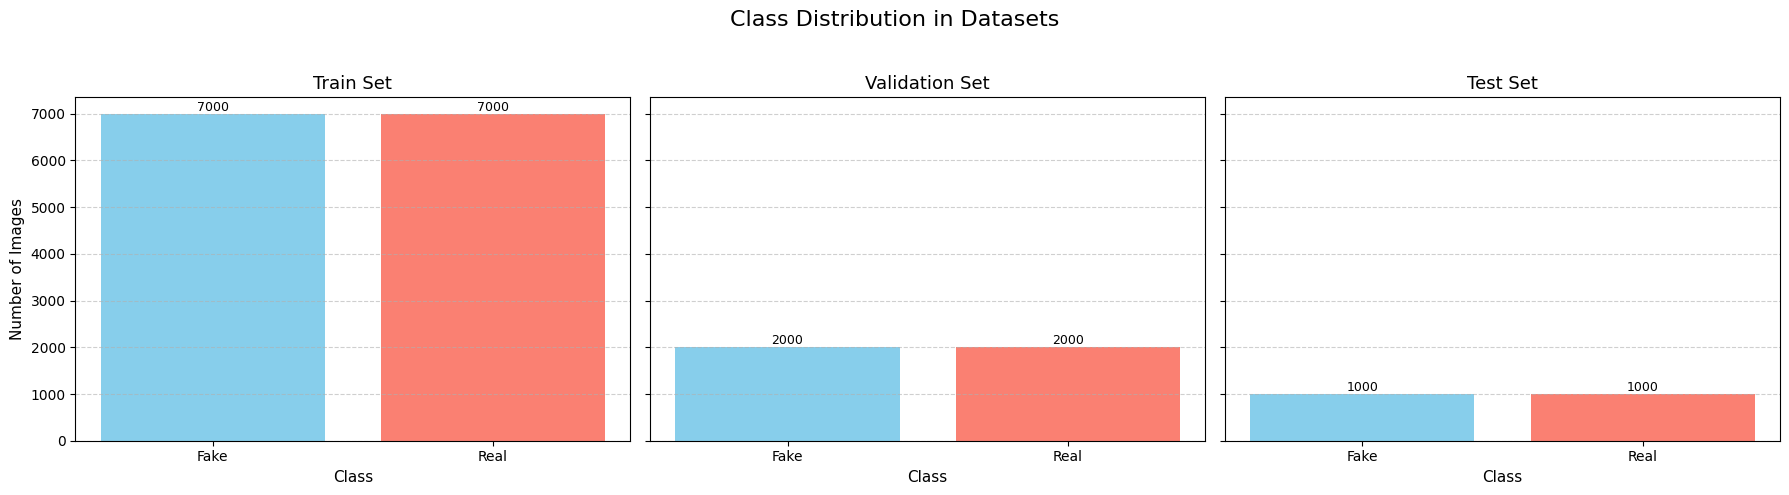

In [ ]:
idx_to_class_name = {v: k for k, v in train_path.class_to_idx.items()}
print(f"Class mapping used: {idx_to_class_name}")

def get_class_counts(dataset_obj, idx_map):
    counts = {}
    if not hasattr(dataset_obj, 'targets'):
        print(f"Warning: Provided dataset object does not have 'targets' attribute. Cannot get counts.")
        return counts
    for target_idx in dataset_obj.targets:
        class_name = idx_map.get(target_idx, f"UnknownLabel_{target_idx}")
        counts[class_name] = counts.get(class_name, 0) + 1
    return dict(sorted(counts.items()))

train_dist = get_class_counts(train_path, idx_to_class_name)
val_dist = get_class_counts(val_path, idx_to_class_name)
test_dist = get_class_counts(test_path, idx_to_class_name)

print(f"\nTrain Set Distribution: {train_dist}")
print(f"Validation Set Distribution: {val_dist}")
print(f"Test Set Distribution: {test_dist}")

datasets_to_plot = {
    "Train Set": train_dist,
    "Validation Set": val_dist,
    "Test Set": test_dist
}

fig, axes = plt.subplots(1, len(datasets_to_plot), figsize=(18, 5), sharey=True)
fig.suptitle('Class Distribution in Datasets', fontsize=16)

bar_colors = ['skyblue', 'salmon']

for i, (name, data) in enumerate(datasets_to_plot.items()):
    ax = axes[i] if len(datasets_to_plot) > 1 else axes

    if not data:
        ax.set_title(f"{name}\n(No data)", fontsize=13)
        ax.text(0.5, 0.5, "No data", ha="center", va="center", transform=ax.transAxes)
        ax.set_xticks([])
        ax.set_yticks([])
        continue

    labels = list(data.keys())
    values = list(data.values())

    bars = ax.bar(labels, values, color=bar_colors[:len(labels)])
    ax.set_title(name, fontsize=13)
    ax.set_xlabel("Class", fontsize=11)
    if i == 0:
        ax.set_ylabel("Number of Images", fontsize=11)

    for bar in bars:
        y_val = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2.0, y_val, int(y_val),
                va='bottom', ha='center', fontsize=9)

    ax.grid(axis='y', linestyle='--', alpha=0.6)
    ax.set_ylim(bottom=0)
    ax.tick_params(axis='x')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# **EDA Whab-deepfake20k**

In [ ]:
import os

def extractzip(zip_path,extract_path):
  if not os.path.exists(extract_path):
    os.makedirs(extract_path)
  !unzip -q "{zip_path}" -d "{extract_path}"

zip_file = '/content/drive/MyDrive/Deepfake_dataset/zip-Whab-deepfake20k.zip'
extract = '/content/unzip-Whab-deepfake'

extractzip(zip_file,extract)

In [ ]:
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as TF

train_tran = TF.Compose([
    TF.Resize((224,224)),
    TF.ToTensor()
])

val_tran = TF.Compose([
    TF.Resize((224,224)),
    TF.ToTensor()
])

train_path = datasets.ImageFolder('/content/unzip-Whab-deepfake/Train',transform = train_tran)
val_path = datasets.ImageFolder('/content/unzip-Whab-deepfake/Validation',transform= val_tran)
test_path = datasets.ImageFolder('/content/unzip-Whab-deepfake/Test',transform=val_tran)

In [ ]:
train_loader = DataLoader(train_path,batch_size = 32,shuffle = True)
val_loader = DataLoader(val_path,batch_size = 32)
test_loader = DataLoader(test_path, batch_size = 32)

In [ ]:
images,labels = next(iter(train_loader))

In [ ]:
images.size() , labels.size()

(torch.Size([32, 3, 224, 224]), torch.Size([32]))

In [ ]:
type(labels)

torch.Tensor

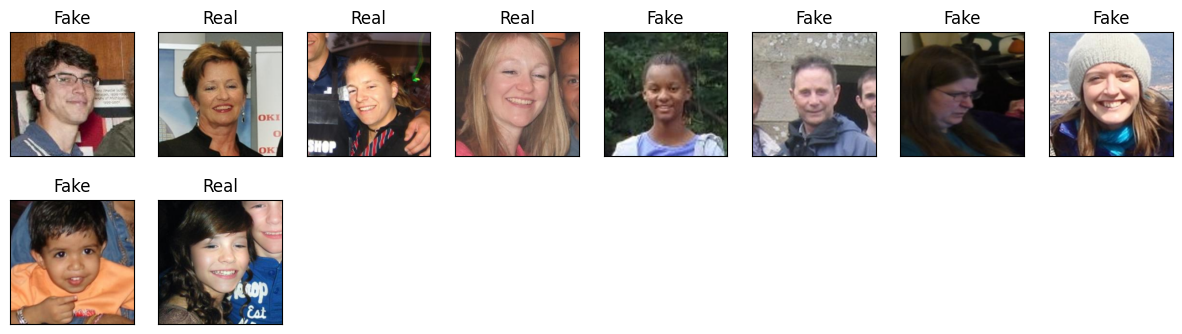

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

idx2_class = {v: k for k, v in train_path.class_to_idx.items()}
fig = plt.figure(figsize=(15, 4))
for i in range(10):
    image = np.transpose(images.cpu()[i],(1,2,0))
    string_label = idx2_class[labels.cpu().tolist()[i]]
    ax = fig.add_subplot(2, 8, i + 1, xticks=[], yticks=[])
    plt.imshow(image)
    ax.set_title(string_label)


Class mapping used: {0: 'Fake', 1: 'Real'}

Train Set Distribution: {'Fake': 7000, 'Real': 7000}
Validation Set Distribution: {'Fake': 2000, 'Real': 2000}
Test Set Distribution: {'Fake': 1000, 'Real': 1000}


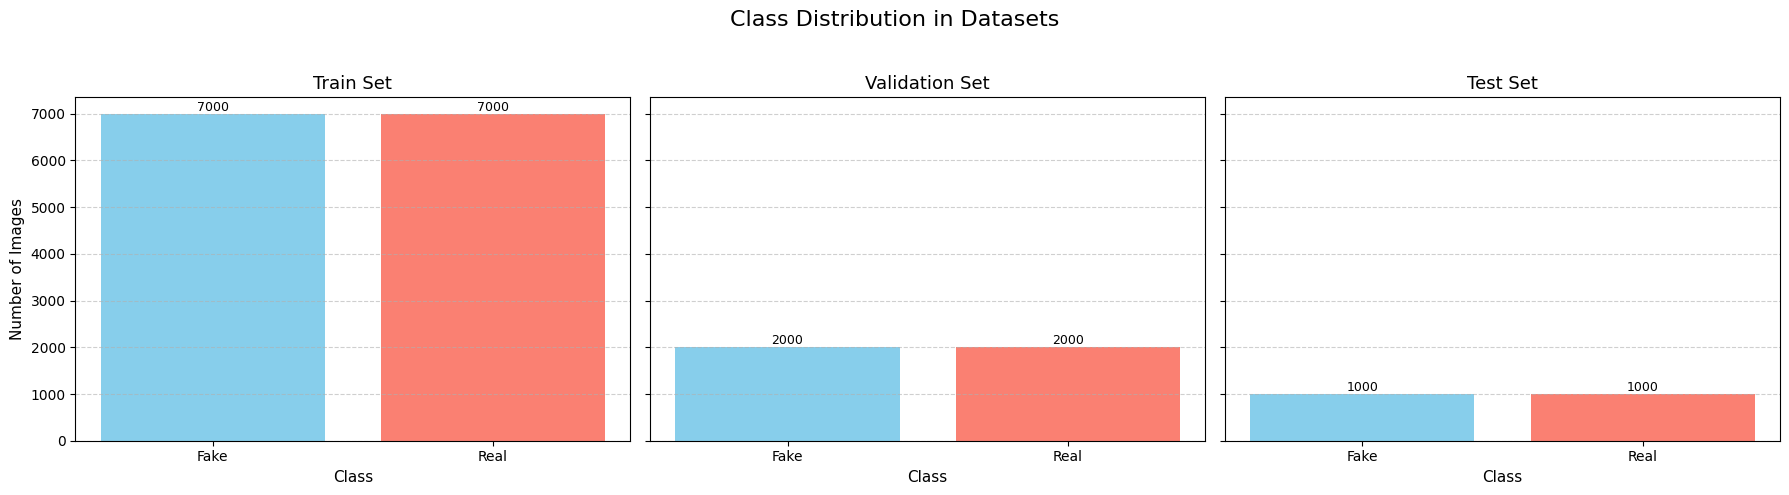

In [ ]:
idx_to_class_name = {v: k for k, v in train_path.class_to_idx.items()}
print(f"Class mapping used: {idx_to_class_name}")

def get_class_counts(dataset_obj, idx_map):
    counts = {}
    if not hasattr(dataset_obj, 'targets'):
        print(f"Warning: Provided dataset object does not have 'targets' attribute. Cannot get counts.")
        return counts
    for target_idx in dataset_obj.targets:
        class_name = idx_map.get(target_idx, f"UnknownLabel_{target_idx}")
        counts[class_name] = counts.get(class_name, 0) + 1
    return dict(sorted(counts.items()))

train_dist = get_class_counts(train_path, idx_to_class_name)
val_dist = get_class_counts(val_path, idx_to_class_name)
test_dist = get_class_counts(test_path, idx_to_class_name)

print(f"\nTrain Set Distribution: {train_dist}")
print(f"Validation Set Distribution: {val_dist}")
print(f"Test Set Distribution: {test_dist}")

datasets_to_plot = {
    "Train Set": train_dist,
    "Validation Set": val_dist,
    "Test Set": test_dist
}

fig, axes = plt.subplots(1, len(datasets_to_plot), figsize=(18, 5), sharey=True)
fig.suptitle('Class Distribution in Datasets', fontsize=16)

bar_colors = ['skyblue', 'salmon']

for i, (name, data) in enumerate(datasets_to_plot.items()):
    ax = axes[i] if len(datasets_to_plot) > 1 else axes

    if not data:
        ax.set_title(f"{name}\n(No data)", fontsize=13)
        ax.text(0.5, 0.5, "No data", ha="center", va="center", transform=ax.transAxes)
        ax.set_xticks([])
        ax.set_yticks([])
        continue

    labels = list(data.keys())
    values = list(data.values())

    bars = ax.bar(labels, values, color=bar_colors[:len(labels)])
    ax.set_title(name, fontsize=13)
    ax.set_xlabel("Class", fontsize=11)
    if i == 0:
        ax.set_ylabel("Number of Images", fontsize=11)

    for bar in bars:
        y_val = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2.0, y_val, int(y_val),
                va='bottom', ha='center', fontsize=9)

    ax.grid(axis='y', linestyle='--', alpha=0.6)
    ax.set_ylim(bottom=0)
    ax.tick_params(axis='x')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# **Deepfake-and-real-images**

In [ ]:
import os

extract_path = '/content/fake-and-real-images'
if not os.path.exists(extract_path):
  os.makedirs(extract_path)

!tar -xzf '/content/drive/MyDrive/Deepfake_dataset/compressed_dataset.tar.gz' -C {extract_path}


In [ ]:
import os
import shutil
import random
from pathlib import Path
from sklearn.model_selection import train_test_split

def sample_from_existing_split_dataset(source_base_dir, target_base_dir, sample_size_per_class=5000):
    """
    Samples a specified number of images from 'Fake' and 'Real' classes
    across existing Train, Validation, and Test splits,
    then combines and resplits the sampled data.

    Args:
        source_base_dir (str): The base directory containing the 'Train', 'Validation',
                               'Test' splits, each with 'Fake' and 'Real' subdirectories.
        target_base_dir (str): The base directory where the *new* sampled and split
                               dataset will be saved.
        sample_size_per_class (int): The number of images to sample from each class
                                     ('Fake', 'Real') from the *entire* source dataset.
                                     (Total sampled images will be 2 * sample_size_per_class)
    """

    print(f"Collecting all Fake and Real image paths from '{source_base_dir}'...")

    all_fake_files = []
    all_real_files = []

    # Collect file paths from all splits
    for split_name in ['Train', 'Validation', 'Test']:
        source_split_dir = os.path.join(source_base_dir, split_name)
        source_fake_dir = os.path.join(source_split_dir, 'Fake')
        source_real_dir = os.path.join(source_split_dir, 'Real')

        if os.path.exists(source_fake_dir):
            fake_files_in_split = [os.path.join(source_fake_dir, f) for f in os.listdir(source_fake_dir) if os.path.isfile(os.path.join(source_fake_dir, f))]
            all_fake_files.extend(fake_files_in_split)
        else:
             print(f"Warning: Fake directory not found in {source_split_dir}")


        if os.path.exists(source_real_dir):
            real_files_in_split = [os.path.join(source_real_dir, f) for f in os.listdir(source_real_dir) if os.path.isfile(os.path.join(source_real_dir, f))]
            all_real_files.extend(real_files_in_split)
        else:
            print(f"Warning: Real directory not found in {source_split_dir}")


    print(f"Found a total of {len(all_fake_files)} fake images and {len(all_real_files)} real images across all splits.")

    print(f"Sampling {sample_size_per_class} images from each class...")

    # Sample images from the combined lists
    if len(all_fake_files) < sample_size_per_class:
        print(f"Warning: Not enough total fake images ({len(all_fake_files)}) to sample {sample_size_per_class}. Using all fake images.")
        sampled_fake_files = all_fake_files
    else:
        sampled_fake_files = random.sample(all_fake_files, sample_size_per_class)

    if len(all_real_files) < sample_size_per_class:
        print(f"Warning: Not enough total real images ({len(all_real_files)}) to sample {sample_size_per_class}. Using all real images.")
        sampled_real_files = all_real_files
    else:
        sampled_real_files = random.sample(all_real_files, sample_size_per_class)

    print(f"Sampled {len(sampled_fake_files)} fake images and {len(sampled_real_files)} real images.")

    # Combine sampled file paths and create labels
    all_sampled_files = sampled_fake_files + sampled_real_files
    all_sampled_labels = ['Fake'] * len(sampled_fake_files) + ['Real'] * len(sampled_real_files)

    if not all_sampled_files:
        print("No sampled files to process. Exiting.")
        return

    print(f"Total sampled images: {len(all_sampled_files)}")

    # Split the combined sampled data into new train, validation, and test sets (70/20/10)
    # First split: 70% train, 30% temp (for val/test)
    train_files, temp_files, train_labels, temp_labels = train_test_split(
        all_sampled_files,
        all_sampled_labels,
        test_size=0.30, # 30% for validation and test combined
        stratify=all_sampled_labels,
        random_state=42 # Ensure reproducibility
    )

    # Second split: Split temp_files into 2/3 validation and 1/3 test (relative to temp_files size)
    # This results in 20% val (2/3 of 30%) and 10% test (1/3 of 30%) of the original sampled data
    val_files, test_files, val_labels, test_labels = train_test_split(
        temp_files,
        temp_labels,
        test_size=1/3, # 1/3 of temp_files for test, 2/3 for validation
        stratify=temp_labels,
        random_state=42 # Ensure reproducibility
    )

    print(f"\nNew data split complete (70/20/10):")
    print(f"  Train: {len(train_files)} images")
    print(f"  Validation: {len(val_files)} images")
    print(f"  Test: {len(test_files)} images")

    # Create target directories and copy/move files
    splits_data = {
        'Train': (train_files, train_labels),
        'Validation': (val_files, val_labels),
        'Test': (test_files, test_labels)
    }

    print("\nCopying files to new split directories...")
    for split_name, (files, labels) in splits_data.items():
        if not files:
            continue

        print(f"  Processing {split_name} set ({len(files)} files)...")
        for file_path, label in zip(files, labels):
            target_dir = os.path.join(target_base_dir, split_name, label)
            os.makedirs(target_dir, exist_ok=True)

            file_name = os.path.basename(file_path)
            target_path = os.path.join(target_dir, file_name)

            # Handle duplicate names (optional, but good practice)
            if os.path.exists(target_path):
                 base, ext = os.path.splitext(file_name)
                 counter = 1
                 while os.path.exists(target_path):
                     new_name = f"{base}_{counter}{ext}"
                     target_path = os.path.join(target_dir, new_name)
                     counter += 1

            try:
                # Use shutil.copy2 to preserve metadata if needed, or shutil.copy
                shutil.copy2(file_path, target_path)
            except Exception as e:
                print(f"❌ Error copying {file_name} to {target_path}: {e}")

    print("\n✅ Dataset sampling and new splitting complete!")
    print(f"New dataset saved in: {os.path.abspath(target_base_dir)}")

    # Verify the number of files saved on disk
    print("\nVerifying counts on disk in new dataset:")
    for split_name in ['Train', 'Validation', 'Test']:
        for class_name in ['Fake', 'Real']:
             split_class_dir = os.path.join(target_base_dir, split_name, class_name)
             if os.path.exists(split_class_dir):
                  file_count = len([f for f in os.listdir(split_class_dir)
                                    if os.path.isfile(os.path.join(split_class_dir, f))])
                  print(f"  {split_name}/{class_name}: {file_count} images")


# --- How to use the function ---

# Set the random seed for reproducibility
random.seed(42)

# Define your source base directory (where the original Dataset folder is)
# Replace '/content/fake-and-real-images/Dataset' with the actual path
source_directory = '/content/fake-and-real-images/kaggle/input/deepfake-and-real-images/Dataset'

# Define the target directory where the *new* sampled and split dataset will be saved
target_directory = 'fake-and-real-images_20k'

# Define the number of images to sample *from each class*
sample_size = 10000

# Run the sampling and splitting process
sample_from_existing_split_dataset(source_directory, target_directory, sample_size_per_class=sample_size)

Found a total of 95134 fake images and 95201 real images across all splits.
Sampling 10000 images from each class...
Sampled 10000 fake images and 10000 real images.
Total sampled images: 20000

New data split complete (70/20/10):
  Train: 14000 images
  Validation: 4000 images
  Test: 2000 images

Copying files to new split directories...
  Processing Train set (14000 files)...
  Processing Validation set (4000 files)...
  Processing Test set (2000 files)...

✅ Dataset sampling and new splitting complete!
New dataset saved in: /content/fake-and-real-images_20k

Verifying counts on disk in new dataset:
  Train/Fake: 7000 images
  Train/Real: 7000 images
  Validation/Fake: 2000 images
  Validation/Real: 2000 images
  Test/Fake: 1000 images
  Test/Real: 1000 images


In [ ]:
import shutil
shutil.make_archive('/content/fake-and-real-images_20k', 'zip', target_directory)
print(f"Zipped dataset saved as: .zip")

from google.colab import drive
drive.mount('/content/drive')
!rsync -a --progress '/content/fake-and-real-images_20k.zip' '/content/drive/MyDrive/Deepfake_dataset'

Zipped dataset saved as: .zip
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
sending incremental file list
fake-and-real-images_20k.zip
    188,798,763 100%   89.61MB/s    0:00:02 (xfr#1, to-chk=0/1)


# **EDA fake-and-real-images**

In [ ]:
import os

def extractzip(zip_path,extract_path):
  if not os.path.exists(extract_path):
    os.makedirs(extract_path)
  !unzip -q "{zip_path}" -d "{extract_path}"

zip_file = '/content/drive/MyDrive/Deepfake_dataset/fake-and-real-images_20k.zip'
extract = '/content/fake-and-real-images'

extractzip(zip_file,extract)

In [ ]:
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as TF

train_tran = TF.Compose([
    TF.Resize((224,224)),
    TF.ToTensor()
])

val_tran = TF.Compose([
    TF.Resize((224,224)),
    TF.ToTensor()
])

train_path = datasets.ImageFolder('/content/fake-and-real-images/Train',transform = train_tran)
val_path = datasets.ImageFolder('/content/fake-and-real-images/Validation',transform= val_tran)
test_path = datasets.ImageFolder('/content/fake-and-real-images/Test',transform=val_tran)

In [ ]:
train_loader = DataLoader(train_path,batch_size = 32,shuffle = True)
val_loader = DataLoader(val_path,batch_size = 32)
test_loader = DataLoader(test_path, batch_size = 32)

In [ ]:
images,labels = next(iter(train_loader))

In [ ]:
images.size() , labels.size()

(torch.Size([32, 3, 224, 224]), torch.Size([32]))

In [ ]:
type(labels)

torch.Tensor

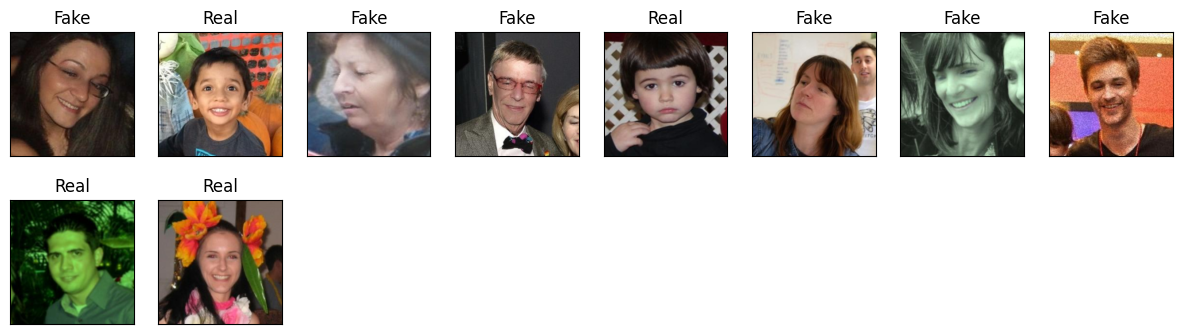

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

idx2_class = {v: k for k, v in train_path.class_to_idx.items()}
fig = plt.figure(figsize=(15, 4))
for i in range(10):
    image = np.transpose(images.cpu()[i],(1,2,0))
    string_label = idx2_class[labels.cpu().tolist()[i]]
    ax = fig.add_subplot(2, 8, i + 1, xticks=[], yticks=[])
    plt.imshow(image)
    ax.set_title(string_label)


Class mapping used: {0: 'Fake', 1: 'Real'}

Train Set Distribution: {'Fake': 7000, 'Real': 7000}
Validation Set Distribution: {'Fake': 2000, 'Real': 2000}
Test Set Distribution: {'Fake': 1000, 'Real': 1000}


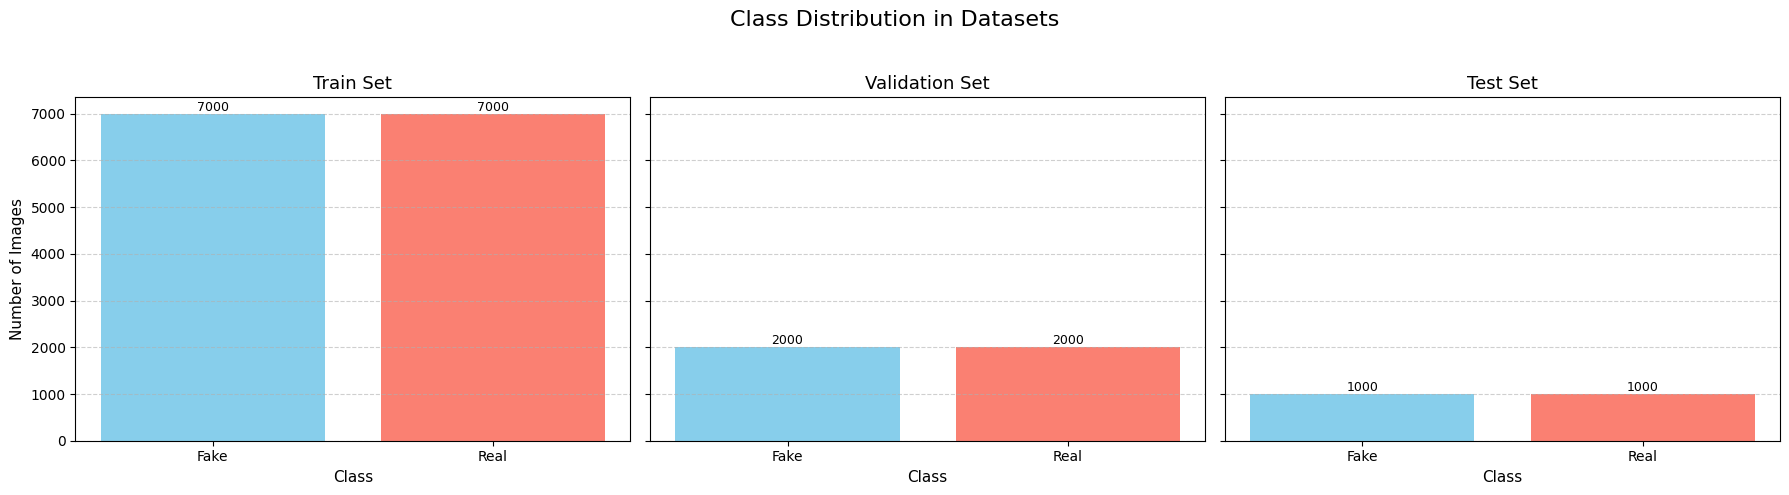

In [ ]:
idx_to_class_name = {v: k for k, v in train_path.class_to_idx.items()}
print(f"Class mapping used: {idx_to_class_name}")

def get_class_counts(dataset_obj, idx_map):
    counts = {}
    if not hasattr(dataset_obj, 'targets'):
        print(f"Warning: Provided dataset object does not have 'targets' attribute. Cannot get counts.")
        return counts
    for target_idx in dataset_obj.targets:
        class_name = idx_map.get(target_idx, f"UnknownLabel_{target_idx}")
        counts[class_name] = counts.get(class_name, 0) + 1
    return dict(sorted(counts.items()))

train_dist = get_class_counts(train_path, idx_to_class_name)
val_dist = get_class_counts(val_path, idx_to_class_name)
test_dist = get_class_counts(test_path, idx_to_class_name)

print(f"\nTrain Set Distribution: {train_dist}")
print(f"Validation Set Distribution: {val_dist}")
print(f"Test Set Distribution: {test_dist}")

datasets_to_plot = {
    "Train Set": train_dist,
    "Validation Set": val_dist,
    "Test Set": test_dist
}

fig, axes = plt.subplots(1, len(datasets_to_plot), figsize=(18, 5), sharey=True)
fig.suptitle('Class Distribution in Datasets', fontsize=16)

bar_colors = ['skyblue', 'salmon']

for i, (name, data) in enumerate(datasets_to_plot.items()):
    ax = axes[i] if len(datasets_to_plot) > 1 else axes

    if not data:
        ax.set_title(f"{name}\n(No data)", fontsize=13)
        ax.text(0.5, 0.5, "No data", ha="center", va="center", transform=ax.transAxes)
        ax.set_xticks([])
        ax.set_yticks([])
        continue

    labels = list(data.keys())
    values = list(data.values())

    bars = ax.bar(labels, values, color=bar_colors[:len(labels)])
    ax.set_title(name, fontsize=13)
    ax.set_xlabel("Class", fontsize=11)
    if i == 0:
        ax.set_ylabel("Number of Images", fontsize=11)

    for bar in bars:
        y_val = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2.0, y_val, int(y_val),
                va='bottom', ha='center', fontsize=9)

    ax.grid(axis='y', linestyle='--', alpha=0.6)
    ax.set_ylim(bottom=0)
    ax.tick_params(axis='x')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()